In [13]:
import numpy as np
import pandas as pd

In [14]:
data = pd.read_csv(r"C:\Users\maddi udith kumar\OneDrive\Desktop\yield_prediction.csv")
data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014.0,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014.0,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014.0,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014.0,Winter,Rice,279151.0,597899.0


In [15]:
data.dropna()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014.0,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014.0,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014.0,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014.0,Winter,Rice,279151.0,597899.0


In [16]:
data.fillna("0",inplace=True)

# Decision tree

Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean Squared Error: 83185220668.54224


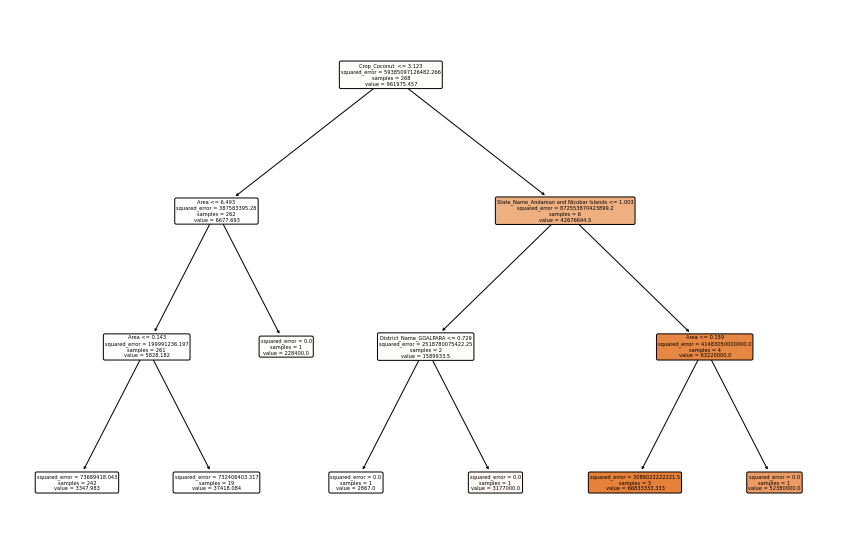

In [17]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('data_1.csv')

# Assuming 'Production' is your target variable and the rest are features
X = data.drop('Production', axis=1)
y = data['Production']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)

# Handle missing values in features
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Handle missing values in the target variable
y = y.fillna(y.mean())

# Scale numerical features
scaler = StandardScaler()
X[X.select_dtypes(include=['float64']).columns] = scaler.fit_transform(X.select_dtypes(include=['float64']))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of values for max_depth and other hyperparameters
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a decision tree regressor
model = DecisionTreeRegressor()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameter values
best_params = grid_search.best_params_

# Create a decision tree regressor with the best hyperparameters
best_model = DecisionTreeRegressor(**best_params)
best_model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = best_model.predict(X_test)

# Evaluate the model (for regression, use appropriate metrics such as mean squared error)
mse = mean_squared_error(y_test, predictions)
print(f"Best Hyperparameters: {best_params}")
print(f"Mean Squared Error: {mse}")

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(best_model, filled=True, feature_names=X.columns, rounded=True)
plt.show()

## Naive Bayes Classification

## Data Loading

In [53]:
import pandas as pd
data = pd.read_csv('data_1.csv')
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Cashewnut,720.0,165.0


In [67]:
df = pd.DataFrame(data)
print(df)


                         State_Name District_Name  Crop_Year       Season  \
0       Andaman and Nicobar Islands      NICOBARS     2000.0  Kharif        
1       Andaman and Nicobar Islands      NICOBARS     2000.0  Kharif        
2       Andaman and Nicobar Islands      NICOBARS     2000.0  Kharif        
3       Andaman and Nicobar Islands      NICOBARS     2000.0  Whole Year    
4       Andaman and Nicobar Islands      NICOBARS     2000.0  Whole Year    
...                             ...           ...        ...          ...   
246086                  West Bengal       PURULIA     2014.0  Summer        
246087                  West Bengal       PURULIA     2014.0  Summer        
246088                  West Bengal       PURULIA     2014.0  Whole Year    
246089                  West Bengal       PURULIA     2014.0  Winter        
246090                  West Bengal       PURULIA     2014.0  Winter        

                       Crop      Area  Production  
0                  Arec

## Data Exploration

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     336 non-null    object 
 1   District_Name  336 non-null    object 
 2   Crop_Year      327 non-null    float64
 3   Season         336 non-null    object 
 4   Crop           336 non-null    object 
 5   Area           323 non-null    float64
 6   Production     335 non-null    float64
dtypes: float64(3), object(4)
memory usage: 18.5+ KB


## using Seaborn to display counts of each season.

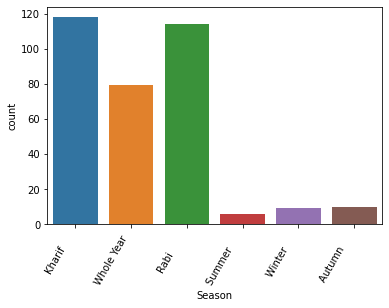

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Season' is the column you want to visualize
sns.countplot(data=data, x='Season')
plt.xticks(rotation=60, ha='right')
plt.show()


##  using Seaborn to plot crop counts by season, adjusting figure size for clarity.

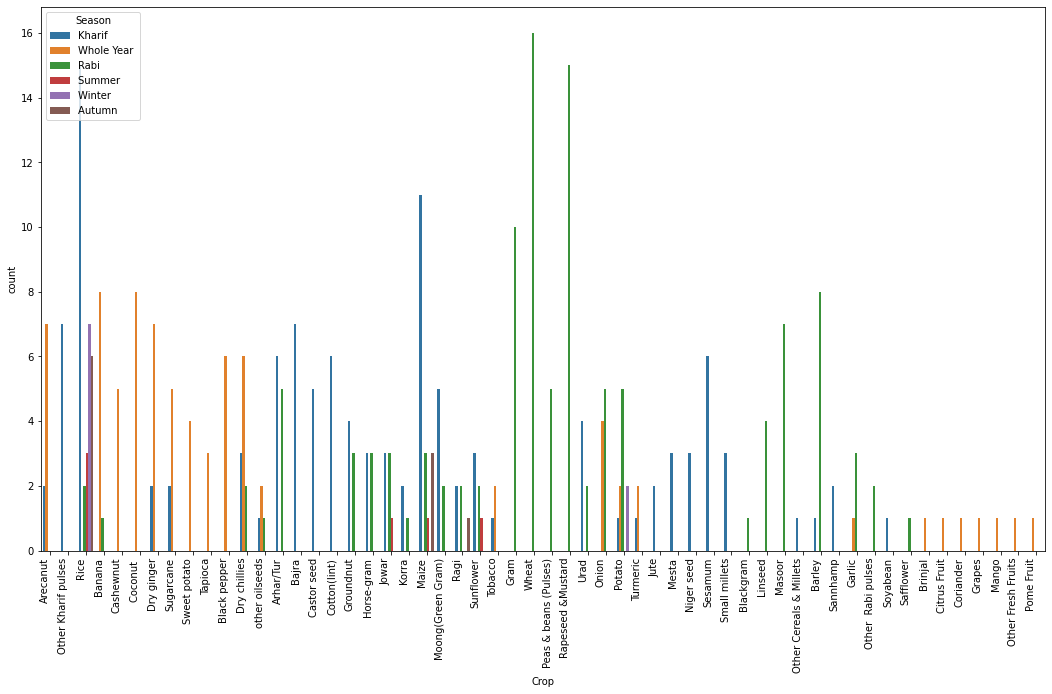

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(18, 10))

# Assuming 'Crop' is the column you want to visualize
# and 'Season' is used for hue
sns.countplot(data=data, x='Crop', hue='Season')
plt.xticks(rotation=90, ha='right')
plt.show()

## Data Processing

### We will now convert the ‘Season’ column from categorical to integer using pandas get_dummies function.

In [57]:
pre_df = pd.get_dummies(data,columns=['Season'],drop_first=True)
pre_df.head()

,State_Name,District_Name,Crop_Year,Crop,Area,Production,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter
0,Andaman and Nicobar Islands,NICOBARS,2000.0,Arecanut,1254.0,2000.0,1,0,0,0,0
1,Andaman and Nicobar Islands,NICOBARS,2000.0,Other Kharif pulses,2.0,1.0,1,0,0,0,0
2,Andaman and Nicobar Islands,NICOBARS,2000.0,Rice,102.0,321.0,1,0,0,0,0
3,Andaman and Nicobar Islands,NICOBARS,2000.0,Banana,176.0,641.0,0,0,0,1,0
4,Andaman and Nicobar Islands,NICOBARS,2000.0,Cashewnut,720.0,165.0,0,0,0,1,0


In [80]:
data = pd.read_csv(r"C:\Users\maddi udith kumar\OneDrive\Desktop\yield_prediction.csv")
data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014.0,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014.0,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014.0,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014.0,Winter,Rice,279151.0,597899.0


## splits data into training and testing sets for modeling.

In [81]:
from sklearn.model_selection import train_test_split

X = pre_df.drop('Crop', axis=1)
y = pre_df['Crop']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

## Model Building and Training and Model Evaluation

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv(r"C:\Users\maddi udith kumar\OneDrive\Desktop\yield_prediction.csv")

# Assuming 'target_column' is the name of the column you want to predict
target_column = 'Crop'
X = data.drop(target_column, axis=1)
y = data[target_column]

# Label encode the target column
le = LabelEncoder()
y = le.fit_transform(y)

# Handle missing values
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median' or 'most_frequent'
X = pd.get_dummies(X)  # One-hot encode categorical variables before imputing
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Gaussian Naive Bayes classifier
model = GaussianNB()

# Fit the model
model.fit(X_train, y_train)

# Evaluate the model performance on the test set
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, average='micro')
print("F1 score:", f1)


Accuracy: 0.04847721408399196
F1 score: 0.04847721408399196


Number of unique classes: 122


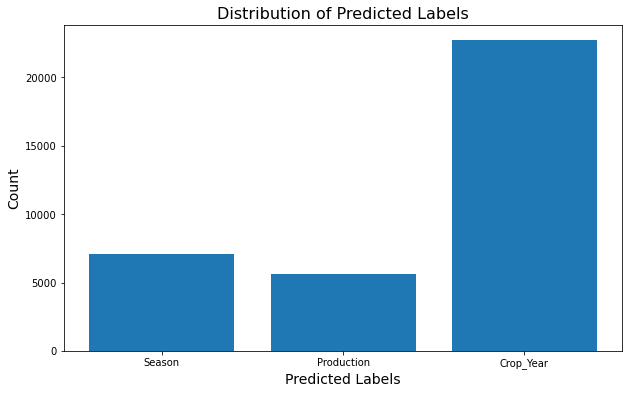

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and y_pred are your true and predicted labels
class_labels = ["Season", "Production", "Crop_Year"]  # Update with your actual class labels
cm = confusion_matrix(y_test, y_pred)

# Check the number of unique classes
unique_classes = np.unique(np.concatenate((y_test, y_pred)))
print("Number of unique classes:", len(unique_classes))

# Update the display labels based on the actual class labels
labels = [f"{class_labels[i % len(class_labels)]}" for i in range(len(unique_classes))]

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(labels, np.sum(cm, axis=0))
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Predicted Labels', fontsize=16)

plt.show()


In [1]:
from collections import defaultdict
import pandas as pd

data = pd.read_csv(r"C:\Users\maddi udith kumar\OneDrive\Desktop\yield_prediction.csv")


features = data[['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area', 'Production']].values.tolist()

labels = data['Area'].values.tolist()

# Function to calculate probabilities
def calculate_probabilities(features, labels):
    class_counts = defaultdict(int)
    feature_counts = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))

    # Count occurrences of each class and feature-value pairs
    for i in range(len(features)):
        label = labels[i]
        class_counts[label] += 1
        for j in range(len(features[i])):
            feature_counts[label][j][features[i][j]] += 1

    # Calculate probabilities
    total_samples = len(labels)
    class_probabilities = {label: count / total_samples for label, count in class_counts.items()}
    feature_probabilities = defaultdict(lambda: defaultdict(lambda: defaultdict(float)))

    for label in class_counts:
        for j in range(len(features[0])):
            for value in feature_counts[label][j]:
                feature_probabilities[label][j][value] = feature_counts[label][j][value] / class_counts[label]

    return class_probabilities, feature_probabilities

# Predict function
def predict(class_probabilities, feature_probabilities, new_instance):
    probabilities = defaultdict(float)

    for label in class_probabilities:
        for j, value in enumerate(new_instance):
            probabilities[label] *= feature_probabilities[label][j][value]

    # Determine the class with the highest probability
    predicted_class = max(probabilities, key=probabilities.get)
    return predicted_class

# Calculate probabilities
class_probabilities, feature_probabilities = calculate_probabilities(features, labels)

new_instance = ['Andaman and Nicobar Islands', 'NICOBARS', '2000.0', 'Kharif', 'Rice', '102.0', '321.0']
predicted_class = predict(class_probabilities, feature_probabilities, new_instance)
print("Predicted class:", predicted_class)

Predicted class: 1254.0


In [2]:
from collections import defaultdict
import pandas as pd

data = pd.read_csv(r"C:\Users\maddi udith kumar\OneDrive\Desktop\yield_prediction.csv")


features = data[['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area', 'Production']].values.tolist()

labels = data['Crop'].values.tolist()

# Function to calculate probabilities
def calculate_probabilities(features, labels):
    class_counts = defaultdict(int)
    feature_counts = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))

    # Count occurrences of each class and feature-value pairs
    for i in range(len(features)):
        label = labels[i]
        class_counts[label] += 1
        for j in range(len(features[i])):
            feature_counts[label][j][features[i][j]] += 1

    # Calculate probabilities
    total_samples = len(labels)
    class_probabilities = {label: count / total_samples for label, count in class_counts.items()}
    feature_probabilities = defaultdict(lambda: defaultdict(lambda: defaultdict(float)))

    for label in class_counts:
        for j in range(len(features[0])):
            for value in feature_counts[label][j]:
                feature_probabilities[label][j][value] = feature_counts[label][j][value] / class_counts[label]

    return class_probabilities, feature_probabilities

# Predict function
def predict(class_probabilities, feature_probabilities, new_instance):
    probabilities = defaultdict(float)

    for label in class_probabilities:
        for j, value in enumerate(new_instance):
            probabilities[label] *= feature_probabilities[label][j][value]

    # Determine the class with the highest probability
    predicted_class = max(probabilities, key=probabilities.get)
    return predicted_class

# Calculate probabilities
class_probabilities, feature_probabilities = calculate_probabilities(features, labels)

new_instance = ['Andaman and Nicobar Islands', 'NICOBARS', '2000.0', 'Kharif', 'Rice', '102.0', '321.0']
predicted_class = predict(class_probabilities, feature_probabilities, new_instance)
print("Predicted class:", predicted_class)

Predicted class: Arecanut


### "Predicted class: Arecanut" essentially means that the model has assigned the class label "Arecanut" to the input data based on its learned patterns and features.